In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
# random walk
n_steps = 1000
samples = 10000
data = np.zeros(samples)

for i in tqdm(range(samples)):
    current = 0
    for step in range(n_steps):
        move = np.random.choice([-1, 1])
        current += move
    data[i] = current

100%|██████████| 10000/10000 [01:53<00:00, 87.77it/s]


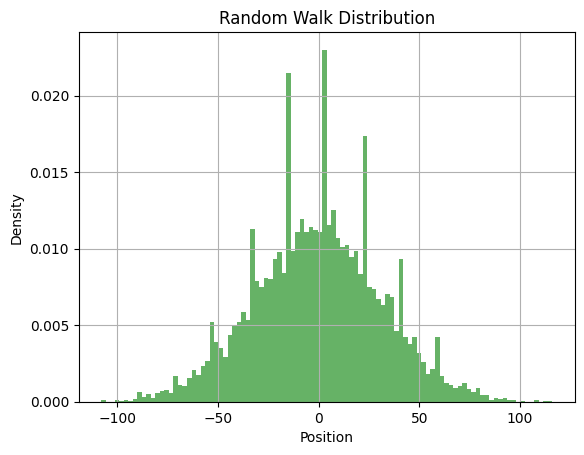

In [11]:
# plot
plt.hist(data, bins=100, density=True, alpha=0.6, color='g')
plt.title('Random Walk Distribution')
plt.xlabel('Position')
plt.ylabel('Density')
plt.grid()
plt.show()

In [44]:
# how about 2d walk?
n_steps = 10000
samples = 10000
plot_range = 50
# create a dictionary to store the data
data = {}
for i in range(-plot_range, plot_range + 1):
    for j in range(-plot_range, plot_range + 1):
        data[(i, j)] = 0


move_set = [[1, 0], [0, 1], [-1, 0], [0, -1]]
for i in tqdm(range(samples)):
    current = [0, 0]
    for step in range(n_steps):
        move = np.random.choice(range(4))
        move = move_set[move]
        current[0] += move[0]
        current[1] += move[1]
    # update the dictionary with the new position
    current = tuple(current)
    if current in data:
        data[current] += 1

100%|██████████| 10000/10000 [23:23<00:00,  7.13it/s]


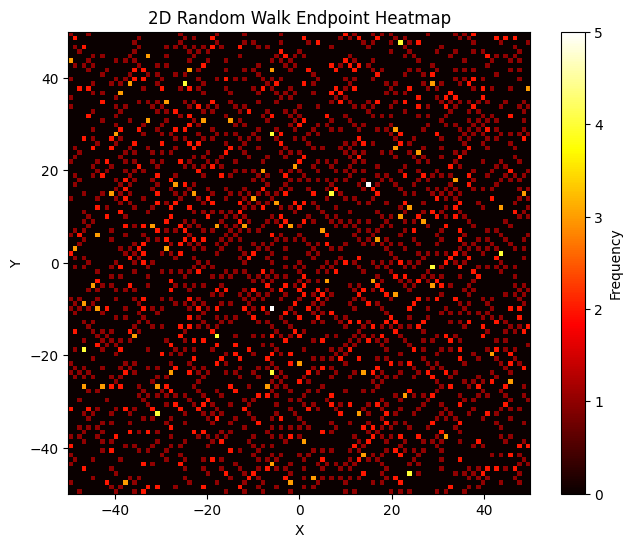

In [45]:
heatmap = np.zeros((2 * plot_range + 1, 2 * plot_range + 1))
for (x, y), count in data.items():
    heatmap[y + plot_range, x + plot_range] = count  # y is row, x is column

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, cmap='hot', interpolation='nearest', extent=[-plot_range, plot_range, -plot_range, plot_range])
plt.colorbar(label='Frequency')
plt.title('2D Random Walk Endpoint Heatmap')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(False)
plt.show()